In [27]:
# scipy
import scipy
print('scipy:', scipy.__version__)
# numpy
import numpy
print('numpy:', numpy.__version__)
# matplotlib
import matplotlib as plt
print('matplotlib:', matplotlib.__version__)
# pandas
import pandas
print('pandas: ', pandas.__version__)
# scikit-learn
import sklearn
print('sklearn:', sklearn.__version__)
#seaborn
import seaborn as sns

scipy: 1.10.1
numpy: 1.24.3
matplotlib: 3.6.0
pandas:  1.5.3
sklearn: 1.3.2


AttributeError: type object 'Axis' has no attribute '_set_ticklabels'

In [6]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_recall_curve, auc
from sklearn.metrics import roc_curve, auc

In [5]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [7]:
from pandas_profiling import ProfileReport

AttributeError: type object 'Axis' has no attribute '_set_ticklabels'

In [8]:
df1 = pd.read_csv(r"C:\Users\hadee\Desktop\notebook-De\dementia_dataset.csv")

In [9]:
df1.head()

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Dataset Column Information:
The different columns of the statistics data set are explained below:

Subject ID - Subject's identification number
MRI ID - Magnetic resonance imaging identification number
Group - Classifier (demented, non-demented and converted)
Visit - How many times a patient has visited
MR Delay - Magnetic Resonance Delay
M/F - Gender
Hand - Dominant hand
Age - range from 60 to 96
EDUC - Education level
SES - Social Economic Status
MMSE - mini mental state examination
CDR - Clinical Dementia Ratio
eTIV - estimated Total Intracranial Volume
nWBV - normalized Whole Brain Volume
ASF - Atlas Scaling Factor

In [11]:
len(df1)

373

In [12]:
df1.shape

(373, 15)

Descriptive Statistics

In [18]:
df1.describe().T

count         mean         std       min       25%       50%       75%  \
Visit  373.0     1.882038    0.922843     1.000     1.000     2.000     2.000   
Age    373.0    77.013405    7.640957    60.000    71.000    77.000    82.000   
EDUC   373.0    14.597855    2.876339     6.000    12.000    15.000    16.000   
SES    354.0     2.460452    1.134005     1.000     2.000     2.000     3.000   
MMSE   371.0    27.342318    3.683244     4.000    27.000    29.000    30.000   
CDR    373.0     0.290885    0.374557     0.000     0.000     0.000     0.500   
eTIV   373.0  1488.128686  176.139286  1106.000  1357.000  1470.000  1597.000   
nWBV   373.0     0.729568    0.037135     0.644     0.700     0.729     0.756   
ASF    373.0     1.195461    0.138092     0.876     1.099     1.194     1.293   

            max  
Visit     5.000  
Age      98.000  
EDUC     23.000  
SES       5.000  
MMSE     30.000  
CDR       2.000  
eTIV   2004.000  
nWBV      0.837  
ASF       1.587

In [14]:
# Show categorical variables
print(df1["Group"].value_counts())
print("-----")
print(df1["M/F"].value_counts())
print("-----")
print(df1["MRI ID"].value_counts())
print("-----")
print(df1["Hand"].value_counts())
print("-----")
print(df1["Subject ID"].value_counts())

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64
-----
F    213
M    160
Name: M/F, dtype: int64
-----
OAS2_0001_MR1    1
OAS2_0118_MR2    1
OAS2_0122_MR2    1
OAS2_0122_MR1    1
OAS2_0121_MR2    1
                ..
OAS2_0057_MR3    1
OAS2_0057_MR2    1
OAS2_0057_MR1    1
OAS2_0056_MR2    1
OAS2_0186_MR3    1
Name: MRI ID, Length: 373, dtype: int64
-----
R    373
Name: Hand, dtype: int64
-----
OAS2_0070    5
OAS2_0048    5
OAS2_0127    5
OAS2_0073    5
OAS2_0034    4
            ..
OAS2_0071    2
OAS2_0069    2
OAS2_0068    2
OAS2_0066    2
OAS2_0092    2
Name: Subject ID, Length: 150, dtype: int64


In [88]:
# How many unique values does each column have?
df.nunique()

Group       2
Gender      2
Age        39
EDUC       12
SES         5
MMSE       19
CDR         4
eTIV      286
nWBV      136
ASF       265
dtype: int64

In [21]:
# Checking unique values in column 'Group'
df1['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

The first two groups of subjects are 'Demented' and 'Non-demented' in which the patient has the Dementia or not, respectively. Patients that develop the Dementia during the tests are grouped as 'Converted', for making this model more generalized towards classification of the disease, I changed the subject's group from 'Converted' to 'Nondemented' for all the previous visits and for the final visit to 'Demented'.

In [22]:
# Filtering rows in df where the 'Group' column is equal to 'Converted' and assigning them to df2
df2 = df1.loc[df1['Group'] == 'Converted']

# Dropping the rows from df1 that have been assigned to df2 using the corresponding index values
df1 = df1.drop(df2.index)

df2.head(10)

Group  Visit Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
33  Converted      1      F   87    14  1.0  30.0  0.0  1406  0.715  1.248
34  Converted      3      F   88    14  1.0  29.0  0.0  1398  0.713  1.255
35  Converted      4      F   92    14  1.0  27.0  0.5  1423  0.696  1.234
36  Converted      1      M   80    20  1.0  29.0  0.0  1587  0.693  1.106
37  Converted      2      M   82    20  1.0  28.0  0.5  1606  0.677  1.093
38  Converted      3      M   84    20  1.0  26.0  0.5  1597  0.666  1.099
57  Converted      1      F   86    12  3.0  30.0  0.0  1430  0.718  1.227
58  Converted      2      F   88    12  3.0  30.0  0.0  1445  0.719  1.215
59  Converted      3      F   91    12  3.0  28.0  0.5  1463  0.696  1.199
81  Converted      1      F   71    16  1.0  27.0  0.0  1289  0.771  1.362

In [23]:
# Creating a new column 'Last_Visit' to identify the last visit for each patient
df2['Last_Visit'] = df2.groupby('Subject ID')['Visit'].transform('max')

# Updating the 'Group' column based on 'Visit' and 'Last_Visit' conditions
df2.loc[df2['Visit'] < df2['Last_Visit'], 'Group'] = 'Nondemented'
df2.loc[df2['Visit'] == df2['Last_Visit'], 'Group'] = 'Demented'

# Dropping the 'Last_Visit' column
df2.drop('Last_Visit', axis=1, inplace=True)

# Displaying the updated DataFrame
df2.head(5)

KeyError: 'Subject ID'

In [24]:
# Combining the DataFrames df1 and df2
frames = [df1, df2]
df = pd.concat(frames)

df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

## Data preperation

In [15]:
# Renaming the 'M/F' column to 'Gender' in the DataFrame
df.rename(columns={'M/F': 'Gender'}, inplace=True)

# Dropping unnecessary columns from the DataFrame
df.drop(columns=['Subject ID', 'MRI ID', 'Hand', 'MR Delay'], inplace=True)

In [16]:
# Checking for missing values in the DataFrame
df.isna().sum()

Group      0
Visit      0
Gender     0
Age        0
EDUC       0
SES       19
MMSE       2
CDR        0
eTIV       0
nWBV       0
ASF        0
dtype: int64

As covered earlier, there are some missing values that need to be taken care of. Imputing the median for MMSE is straightforward. There are only two two missing values so there is not much to think about here.

Imputing values for SES is a bit tricky. SES is an ordinal variable which gets coded as an integer. However, SES is really categorical in nature. I am not familiar with techniques for imputing an ordinal variable. I decided to impute the median. In a future version, I may research and try a few other imputation methods for ordinal variables. Possibly KNN.

In [20]:
# Imputing missing values in the 'SES' column with the 
df.SES.fillna(df.SES.mode()[0], inplace=True)

# Imputing missing values in the 'MMSE' column with the median
median_MMSE = df1['MMSE'].median()
df['MMSE'].fillna(median_MMSE, inplace=True)


df.isna().sum()

Group     0
Visit     0
Gender    0
Age       0
EDUC      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [81]:
#Change:categorical columns to numeric columns 
# Label Encoding the categorical attributes
le = LabelEncoder ()
df["Gender"] = le.fit_transform (df["Gender"].values)
df["Group"] = le.fit_transform (df["Group"].values )

#Group:
#0 : Demented
#1 : Nondemented

In [25]:
# Printing the mapping of encoded values to original classes for 'Gender'
print(f'Sex:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}\n\n')

df.Group = le.fit_transform(df.Group.values)
print(f'Group:\n0 : {le.classes_[0]}\n1 : {le.classes_[1]}')

NameError: name 'le' is not defined

In [83]:
# Preparing Profile Report EDA on our dataset
ProfileReport(df, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
df.corr()

Group    Gender       Age      EDUC       SES      MMSE       CDR  \
Group   1.000000 -0.233862  0.038436  0.240734 -0.127525  0.593735 -0.839328   
Gender -0.233862  1.000000 -0.037726  0.089279 -0.048504 -0.166521  0.202140   
Age     0.038436 -0.037726  1.000000 -0.027886 -0.045410  0.055607 -0.026257   
EDUC    0.240734  0.089279 -0.027886  1.000000 -0.691222  0.194454 -0.153121   
SES    -0.127525 -0.048504 -0.045410 -0.691222  1.000000 -0.139063  0.052313   
MMSE    0.593735 -0.166521  0.055607  0.194454 -0.139063  1.000000 -0.679837   
CDR    -0.839328  0.202140 -0.026257 -0.153121  0.052313 -0.679837  1.000000   
eTIV    0.025978  0.572549  0.042348  0.257015 -0.249030 -0.031789  0.022819   
nWBV    0.310820 -0.249618 -0.518359 -0.012200  0.092361  0.341857 -0.344819   
ASF    -0.020945 -0.561647 -0.035067 -0.241752  0.240831  0.039494 -0.029340   

            eTIV      nWBV       ASF  
Group   0.025978  0.310820 -0.020945  
Gender  0.572549 -0.249618 -0.561647  
Age     0.042348 -0.518359 -0.035067  
EDUC    0.257015 -0.012200 -0.241752  
SES    -0.249030  0.092361  0.240831  
MMSE   -0.031789  0.341857  0.039494  
CDR     0.022819 -0.344819 -0.029340  
eTIV    1.000000 -0.210122 -0.988877  
nWBV   -0.210122  1.000000  0.213476  
ASF    -0.988877  0.213476  1.000000

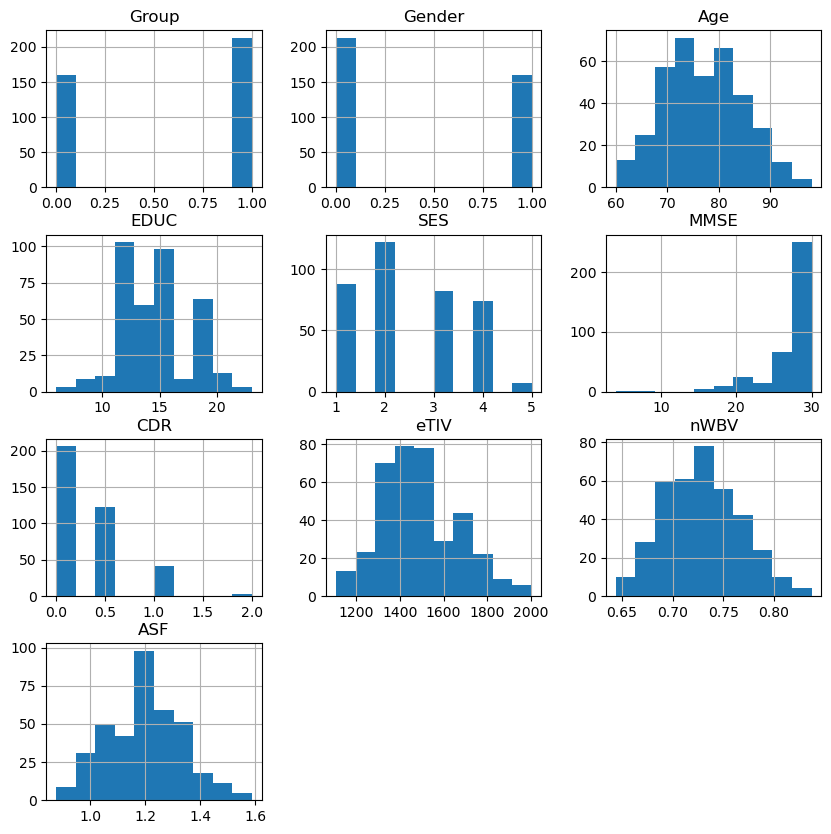

In [89]:
df.hist(figsize = (10,10))
plt.show()

C:\Users\hadee\AppData\Local\Temp\ipykernel_18668\179866481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Group', palette='Set2').set(title = 'Dementia Group')


[Text(0.5, 1.0, 'Dementia Group')]

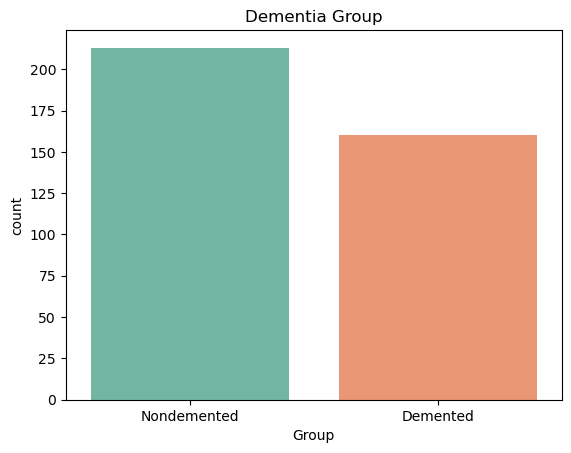

In [33]:
# Creating a count plot with 'Group' on the x-axis
sns.countplot(data=df, x='Group', palette='Set2').set(title = 'Dementia Group')

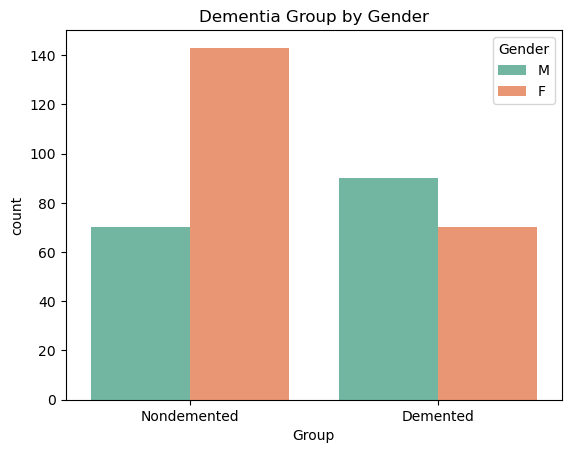

In [34]:
# Visualizing the distribution of 'Group' by 'Gender' using a count plot
sns.countplot(data=df, x='Group', palette='Set2', hue='Gender').set(title = 'Dementia Group by Gender');

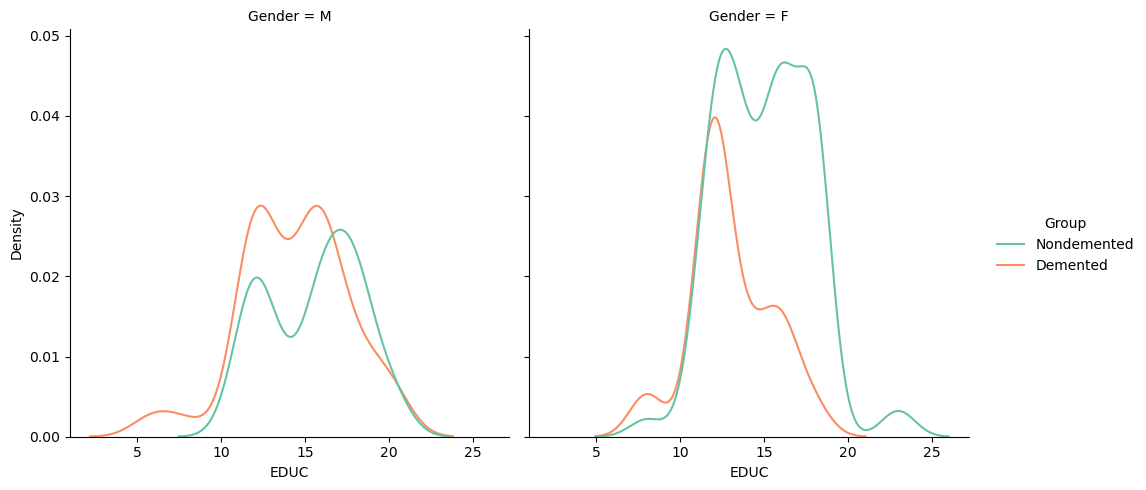

In [35]:
# Visualizing the distribution of Education for each 'Gender' and 'Group'
sns.displot(data=df, x='EDUC', col='Gender', palette='Set2', hue='Group', kind='kde')

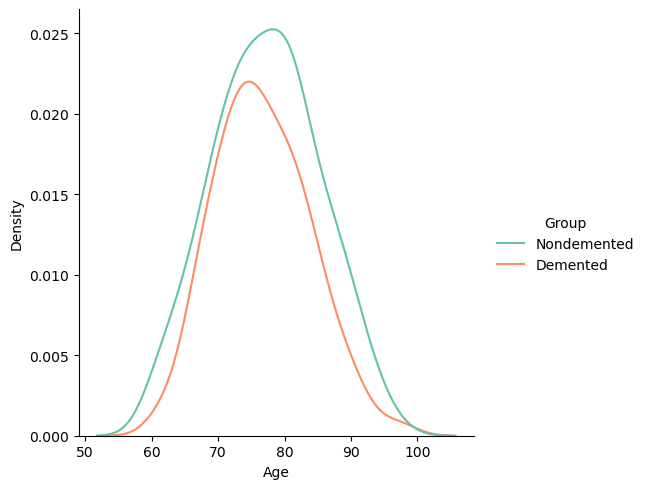

In [36]:
# Visualizing the distribution of 'Age' for each 'Group'
sns.displot(data=df, x='Age', hue='Group', kind="kde", palette='Set2');

In [28]:
# Box and Whisker Plots
df1.plot(kind='box', subplots=True, layout=(2,5))
plt.show()

AttributeError: type object 'Axis' has no attribute '_set_ticklabels'

We can treat the outliers based on IQR, and cap the outliers on the basis of lower visker and upper visker.

In [42]:
''''Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

C:\Users\hadee\AppData\Local\Temp\ipykernel_18668\4081888587.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
C:\Users\hadee\AppData\Local\Temp\ipykernel_18668\4081888587.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)


In [43]:
'''''df_out = df[~((df[colnames] < (lower)) |(df[colnames] > (upper))).any(axis=1)]

NameError: name 'colnames' is not defined

In [90]:
df.columns

Index(['Group', 'Gender', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV',
       'ASF'],
      dtype='object')

Education level.
Mini-mental state examination score.
Clinical dementia rating.
Normalized whole brain volume.
Estimated total intercranial volume.

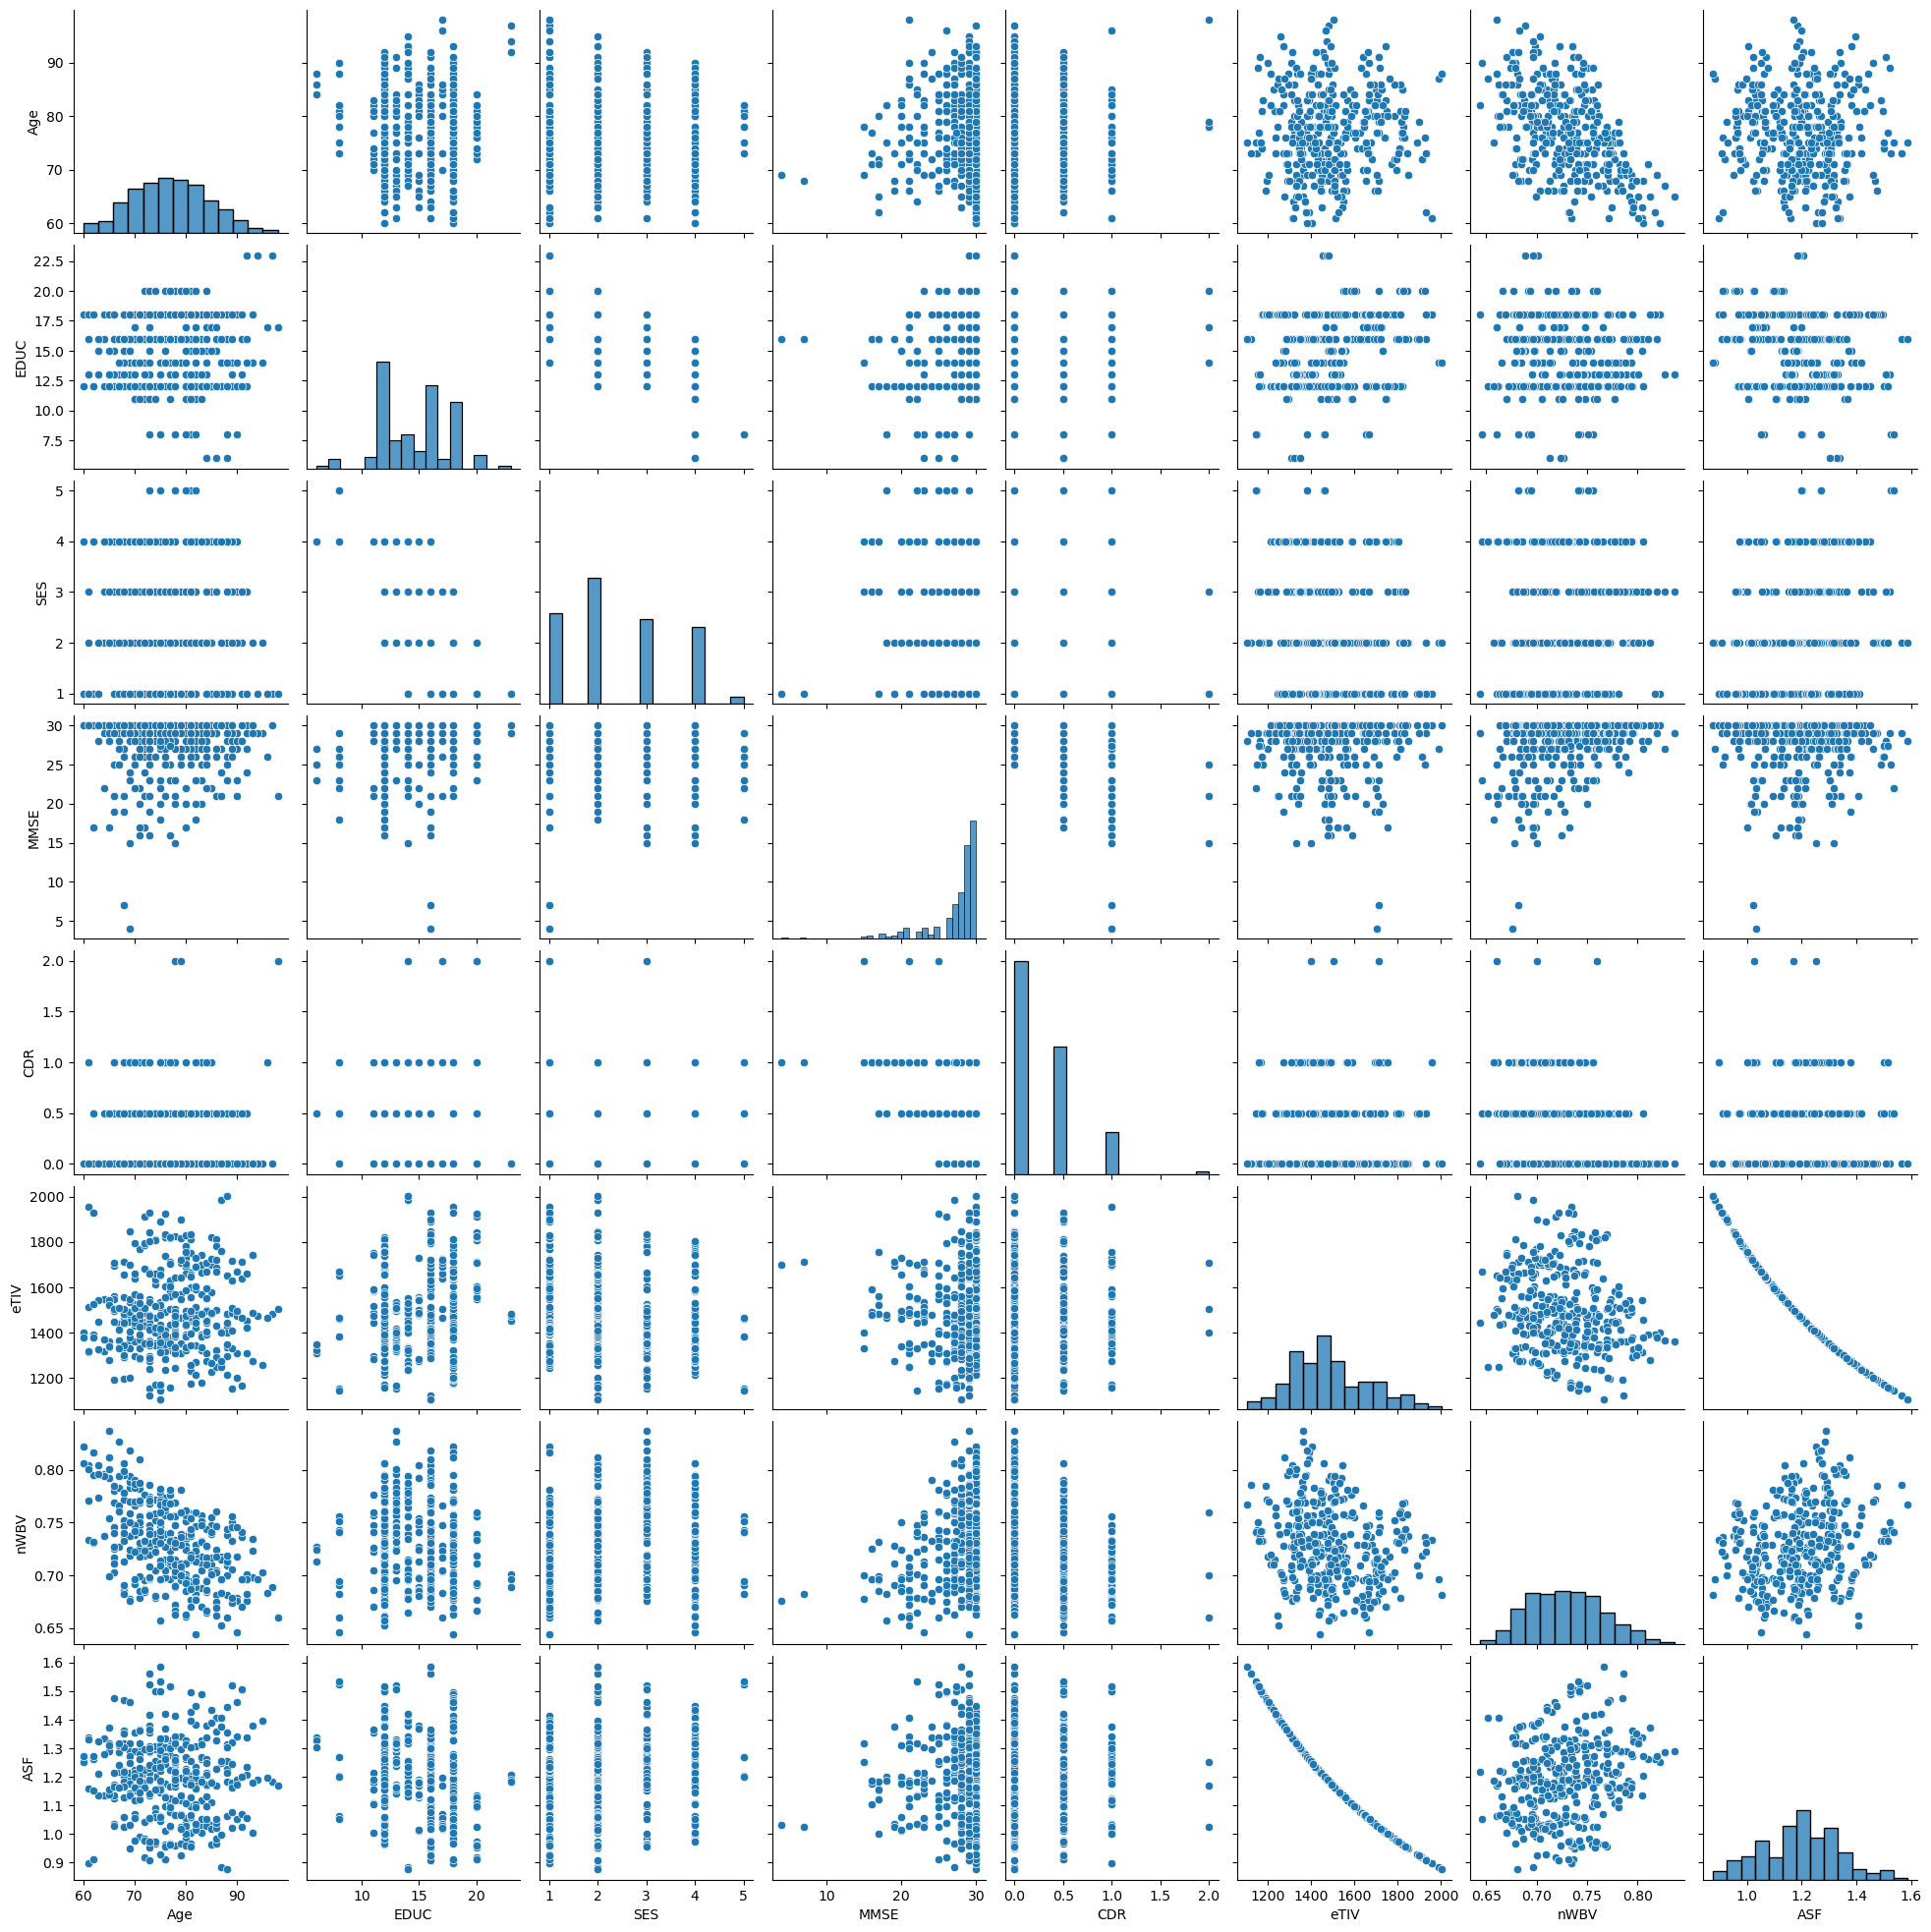

In [41]:
# Scatterplot Matrix
sns.pairplot(df)

In [30]:
df1.corr()

C:\Users\hadee\AppData\Local\Temp\ipykernel_19584\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


Visit       Age      EDUC       SES      MMSE       CDR      eTIV  \
Visit  1.000000  0.150466  0.005245 -0.020421 -0.028221 -0.048868  0.108277   
Age    0.150466  1.000000 -0.049768 -0.004661  0.044946 -0.033968  0.039135   
EDUC   0.005245 -0.049768  1.000000 -0.695491  0.191568 -0.171576  0.257431   
SES   -0.020421 -0.004661 -0.695491  1.000000 -0.125216  0.056578 -0.273299   
MMSE  -0.028221  0.044946  0.191568 -0.125216  1.000000 -0.691226 -0.038349   
CDR   -0.048868 -0.033968 -0.171576  0.056578 -0.691226  1.000000  0.009362   
eTIV   0.108277  0.039135  0.257431 -0.273299 -0.038349  0.009362  1.000000   
nWBV  -0.084771 -0.488989  0.023647  0.052635  0.371029 -0.350542 -0.198849   
ASF   -0.109945 -0.027714 -0.241982  0.263643  0.049846 -0.016556 -0.988503   

           nWBV       ASF  
Visit -0.084771 -0.109945  
Age   -0.488989 -0.027714  
EDUC   0.023647 -0.241982  
SES    0.052635  0.263643  
MMSE   0.371029  0.049846  
CDR   -0.350542 -0.016556  
eTIV  -0.198849 -0.988503  
nWBV   1.000000  0.200549  
ASF    0.200549  1.000000

In [31]:
df1['CDR'].unique()

array([0. , 0.5, 1. , 2. ])

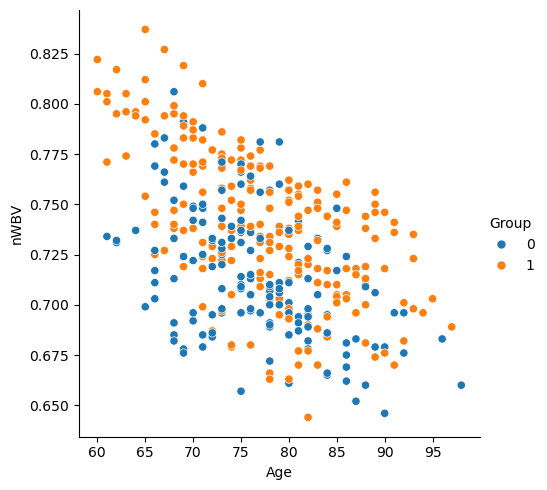

In [67]:
sns.relplot(x= 'Age', y='nWBV', hue='Group', data=df)

In [39]:
# Assuming 'df' is your DataFrame
fig, ax = plt.subplots()

# Scatter plot
scatter = ax.scatter(x=df['Age'], y=df['CDR'], c=df['Group'], cmap='viridis')

# Legend
legend = ax.legend(*scatter.legend_elements(), title='Group')
ax.add_artist(legend)

# Labels and title
ax.set_xlabel('Age')
ax.set_ylabel('CDR')
ax.set_title('Scatter Plot of Age vs CDR')

plt.show()

AttributeError: module 'matplotlib' has no attribute 'subplots'

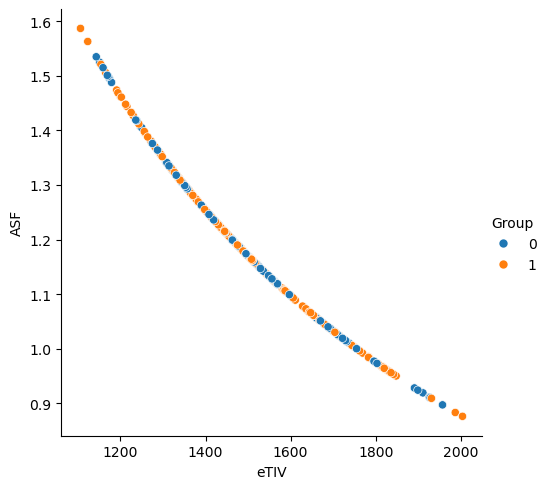

In [93]:
sns.relplot(x= 'eTIV', y='ASF', hue='Group', data=df)

In [38]:
pip install --upgrade matplotlib

  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hadee\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [26]:
sns.relplot(x= 'Age', y='CDR', hue='Gender', data=df)

NameError: name 'sns' is not defined

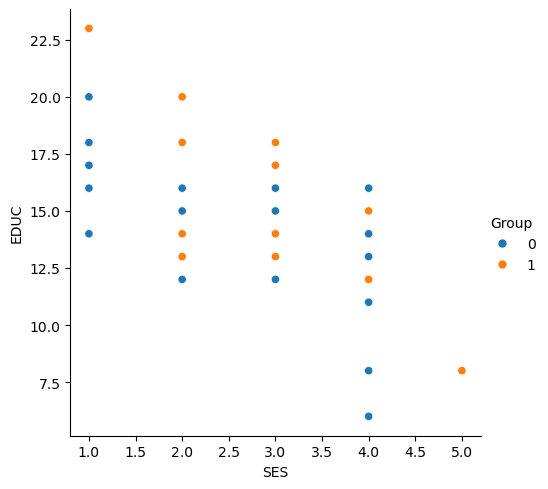

In [73]:
sns.relplot(x= 'SES', y='EDUC', hue='Group', data=df)

## 5. Evaluate Algorithms

In [40]:
dataset = df.copy()

In [41]:
# Nondemented = 0
# Demented = 1
# Converted = 2
dataset=dataset.replace('Nondemented', 0).replace('Demented', 1).replace('Converted',2)

In [42]:
dataset

Group  Visit Gender  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0        0      1      M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1        0      2      M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2        1      1      M   75    12  2.0  23.0  0.5  1678  0.736  1.046
3        1      2      M   76    12  2.0  28.0  0.5  1738  0.713  1.010
4        1      3      M   80    12  2.0  22.0  0.5  1698  0.701  1.034
..     ...    ...    ...  ...   ...  ...   ...  ...   ...    ...    ...
297      2      1      F   68    16  3.0  30.0  0.0  1298  0.799  1.352
298      2      2      F   73    16  3.0  29.0  0.5  1287  0.771  1.364
346      2      1      M   84    16  2.0  30.0  0.0  1404  0.710  1.250
347      2      2      M   87    16  2.0  30.0  0.0  1398  0.696  1.255
348      2      3      M   89    16  2.0  30.0  0.5  1408  0.679  1.246

[373 rows x 11 columns]

In [43]:
#Split
# Importing the necessary library for train-test split
from sklearn.model_selection import train_test_split

# Assigning the 'Group' column as the target variable
y = df.Group

# Assigning the remaining columns as the features
X = df.drop(['Group'], axis=1)

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [254]:
# Standardization of features
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std = std_scaler.fit_transform ( X_train )
X_test_std = std_scaler.transform ( X_test )

In [138]:
# Printing dimensions of the training and testing data again
print('Shape of train data:',X_train.shape)
print('Shape of train labels:',y_train.shape)
print('Shape of test data:',X_test.shape)
print('Shape of test labels:',y_test.shape)

Shape of train data: (298, 9)
Shape of train labels: (298,)
Shape of test data: (75, 9)
Shape of test labels: (75,)


## Models

Train Logistic Regression Model:

In [250]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_std, y_train)

LogisticRegression(solver='liblinear')

Make Predictions:

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.93      0.96        41

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



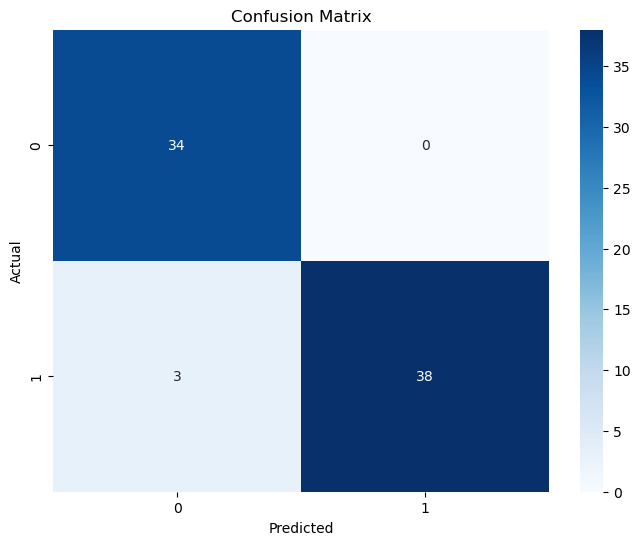

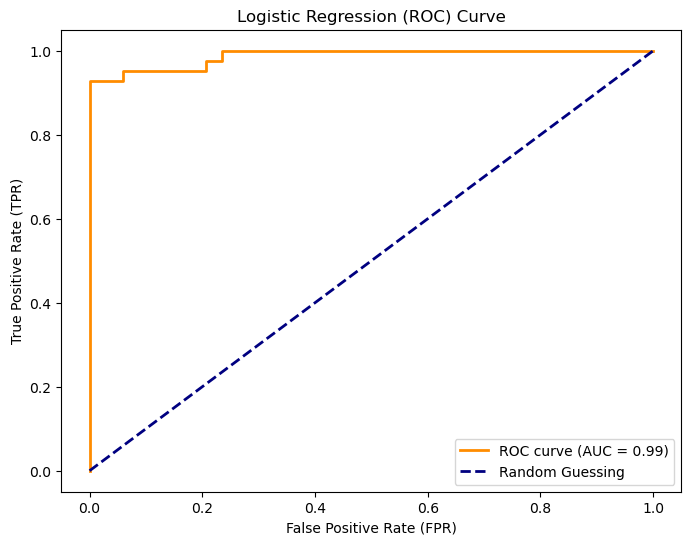

In [251]:
y_pred = lr_model.predict(X_test_std)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Predict probabilities for the positive class
y_prob = model.predict_proba(X_test_std)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Logistic Regression (ROC) Curve')
plt.legend()
plt.show()

Random Forest Accuracy: 0.96
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.93      0.96        41

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



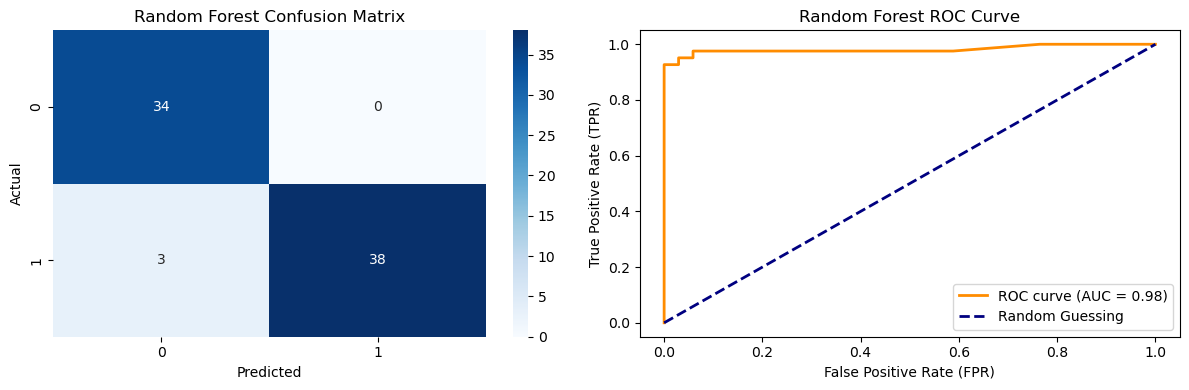

In [243]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_std, y_train)

# Make Predictions
y_pred_rf = rf_model.predict(X_test_std)

# Evaluate Model Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification Report
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC Curve for Random Forest
y_prob_rf = rf_model.predict_proba(X_test_std)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.subplot(1, 2, 2)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

XGBoost Accuracy: 0.96
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        34
           1       1.00      0.93      0.96        41

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



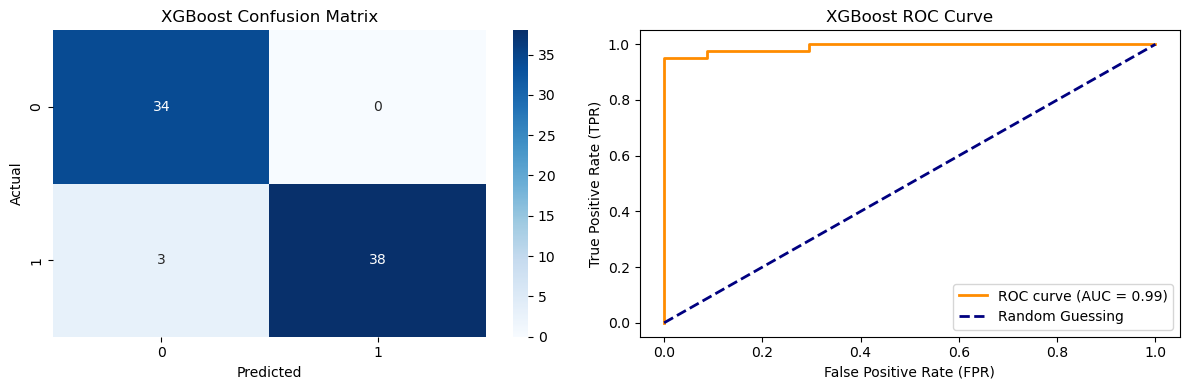

In [248]:
# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_std, y_train)

# Make Predictions
y_pred_xgb = xgb_model.predict(X_test_std)

# Evaluate Model Performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

# Classification Report
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot Confusion Matrix
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot ROC Curve for XGBoost
y_prob_xgb = xgb_model.predict_proba(X_test_std)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.subplot(1, 2, 2)
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('XGBoost ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (10).

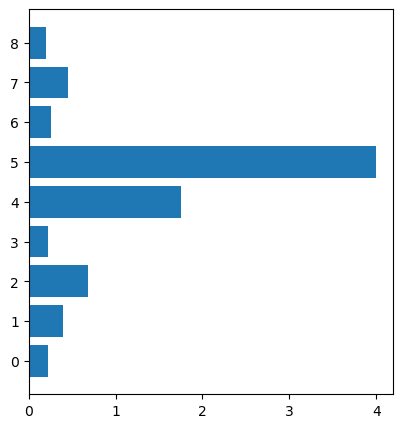

In [259]:
# Compute Feature Importance
lr_feature_importance = np.abs(lr_model.coef_[0])
rf_feature_importance = rf_model.feature_importances_
xgb_feature_importance = xgb_model.feature_importances_

# Compare Feature Importance
feature_names = df.columns

plt.figure(figsize=(16, 5))

# Logistic Regression Feature Importance
plt.subplot(1, 3, 1)
plt.barh(range(len(lr_feature_importance)), lr_feature_importance, align='center')
plt.yticks(range(len(lr_feature_importance)), feature_names)
plt.xlabel('Logistic Regression Feature Importance')
plt.title('Logistic Regression')


In [217]:
# Logistic Regression Classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = X_train_std
Y = y_train

kfold = KFold(n_splits=10)

model = LogisticRegression(solver='liblinear')

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())





0.9798850574712643


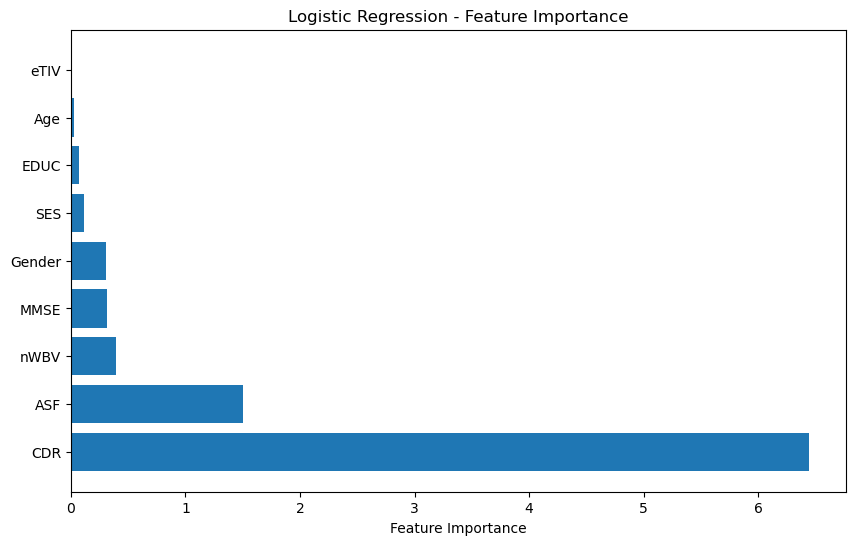

Mean Accuracy: 0.9698850574712644
Models Accuracy = 94.69999999999999%
              precision    recall  f1-score   support

    Demented       0.92      0.97      0.94        34
Non Demented       0.97      0.93      0.95        41

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [227]:
# Assuming X_train_std and y_train are defined
X = X_train
Y = y_train

# Set up KFold for cross-validation
kfold = KFold(n_splits=10)

# Create a logistic regression model
model = LogisticRegression(solver='liblinear')

# Fit the model with training data
model.fit(X, Y)

# Perform cross-validation
results = cross_val_score(model, X, Y, cv=kfold)

# Get feature importance
feature_importance = np.abs(model.coef_[0])

# Get feature names
feature_names = X.columns

# Sort feature importance and feature names in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
feature_importance_sorted = feature_importance[sorted_idx]
feature_names_sorted = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance_sorted, align='center')
plt.yticks(range(len(feature_importance)), feature_names_sorted)
plt.xlabel('Feature Importance')
plt.title('Logistic Regression - Feature Importance')
plt.show()

# Print the mean accuracy
print("Mean Accuracy:", results.mean())
print(f'Models Accuracy = {round(accuracy_score(y_test,Ypred),3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, Ypred, target_names=target_names))

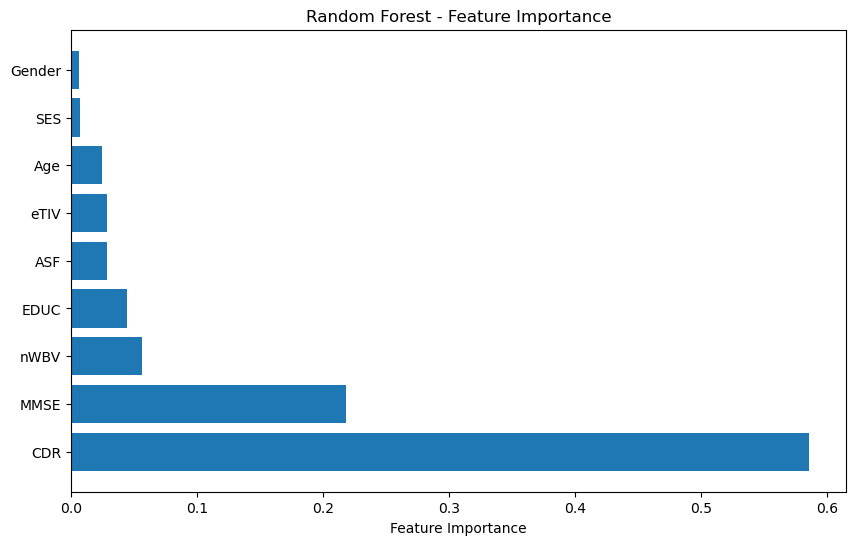

Mean Accuracy: 0.9833333333333334
Models Accuracy = 94.69999999999999%
              precision    recall  f1-score   support

    Demented       0.89      1.00      0.94        34
Non Demented       1.00      0.90      0.95        41

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  break


In [262]:

# Assuming X_train_std and y_train are defined
X = X_train
Y = y_train

# Set up KFold for cross-validation
kfold = KFold(n_splits=10)

# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model with training data
rf_model.fit(X, Y)

# Perform cross-validation
results = cross_val_score(rf_model, X, Y, cv=kfold)

# Get feature importance
feature_importance = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance and feature names in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
feature_importance_sorted = feature_importance[sorted_idx]
feature_names_sorted = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance_sorted, align='center')
plt.yticks(range(len(feature_importance)), feature_names_sorted)
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

# Print the mean accuracy
print("Mean Accuracy:", results.mean())

# Assuming X_test_std and y_test are defined
Ypred = rf_model.predict(X_test_std)

# Print model accuracy and classification report on the test set
print(f'Models Accuracy = {round(accuracy_score(y_test, Ypred), 3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, Ypred, target_names=target_names))


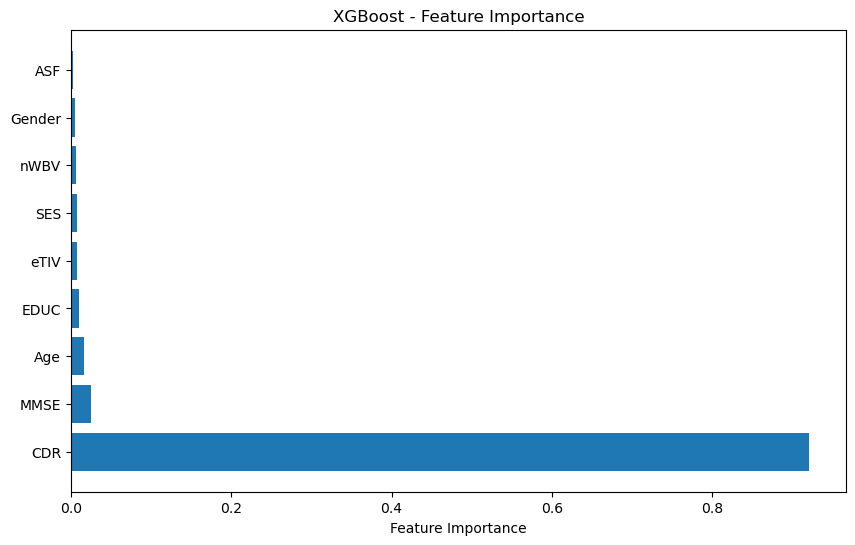

Mean Accuracy: 0.9800000000000001
Models Accuracy = 45.300000000000004%
              precision    recall  f1-score   support

    Demented       0.45      1.00      0.62        34
Non Demented       0.00      0.00      0.00        41

    accuracy                           0.45        75
   macro avg       0.23      0.50      0.31        75
weighted avg       0.21      0.45      0.28        75



C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [264]:
# Assuming X_train_std and y_train are defined
X = X_train
Y = y_train

# Set up KFold for cross-validation
kfold = KFold(n_splits=10)

# Create an XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model with training data
xgb_model.fit(X, Y)

# Perform cross-validation
results = cross_val_score(xgb_model, X, Y, cv=kfold)

# Get feature importance
feature_importance = xgb_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importance and feature names in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
feature_importance_sorted = feature_importance[sorted_idx]
feature_names_sorted = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance_sorted, align='center')
plt.yticks(range(len(feature_importance)), feature_names_sorted)
plt.xlabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.show()

# Print the mean accuracy
print("Mean Accuracy:", results.mean())

# Assuming X_test_std and y_test are defined
Ypred = xgb_model.predict(X_test_std)

# Print model accuracy and classification report on the test set
print(f'Models Accuracy = {round(accuracy_score(y_test, Ypred), 3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, Ypred, target_names=target_names))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        34
           1       0.87      1.00      0.93        41

    accuracy                           0.92        75
   macro avg       0.94      0.91      0.92        75
weighted avg       0.93      0.92      0.92        75

Confusion Matrix:
[[28  6]
 [ 0 41]]


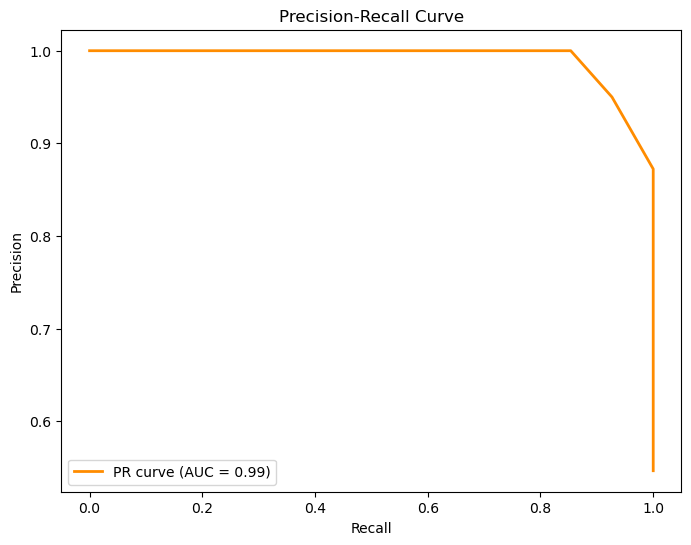

In [270]:
# Assuming X_train_std and y_train are defined
X = X_train
Y = y_train

# Create a KNN model
knn_model = KNeighborsClassifier()

# Fit the model with training data
knn_model.fit(X_train_std, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_std)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, knn_model.predict_proba(X_test_std)[:, 1])
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [321]:
# KNN Classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X = X_train_std
Y = y_train

kfold = KFold(n_splits=10)
model = KNeighborsClassifier()


model.fit(X, Y)
Ypred = model.predict(X_test)

results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean(),3))

target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, Ypred, target_names=target_names))

results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.933
              precision    recall  f1-score   support

    Demented       0.45      1.00      0.62        34
Non Demented       0.00      0.00      0.00        41

    accuracy                           0.45        75
   macro avg       0.23      0.50      0.31        75
weighted avg       0.21      0.45      0.28        75

0.9329885057471264


C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `ze

In [320]:
# CART Classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import sklearn as sk

X = X_train_std
Y = y_train

kfold = KFold(n_splits=10)
model = DecisionTreeClassifier()

model.fit(X, Y)
Ypred = model.predict(X_test)

results = cross_val_score(model, X, Y, cv=kfold)
print(round(results.mean(),3))

target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, Ypred, target_names=target_names))

0.973
              precision    recall  f1-score   support

    Demented       0.45      1.00      0.62        34
Non Demented       0.00      0.00      0.00        41

    accuracy                           0.45        75
   macro avg       0.23      0.50      0.31        75
weighted avg       0.21      0.45      0.28        75



C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hadee\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `

In [150]:
#Lets define every model with multiple parameters for the selection of best model with best parameters.
model_params = {
    'svm':{
        'model': SVC(),
        'params':{
            'C' : [1,2,3],
            'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'logistic':{
        'model':LogisticRegression(),
        'params':{
            'penalty' : ['l1', 'l2', 'elasticnet'],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
            
        }
    },
    'RF':{
        'model':RandomForestClassifier(n_jobs = -1),
        'params':{
            'n_estimators':[100,200,300,400,500],
            'criterion' : ["gini", "entropy"]
            
        }
    },
    'DT':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion' : ["gini", "entropy"],
            'splitter':["best", "random"]
        }
    }
}

In [192]:
model = RandomForestClassifier(n_estimators=300,criterion='gini',n_jobs = -1) #From the above insights.
model.fit(X_train, y_train)
Ypred = model.predict(X_test)

print(f'Models Accuracy = {round(accuracy_score(y_test,Ypred),3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, Ypred, target_names=target_names))

Models Accuracy = 94.69999999999999%
              precision    recall  f1-score   support

    Demented       0.92      0.97      0.94        34
Non Demented       0.97      0.93      0.95        41

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [46]:
model = RandomForestClassifier(n_estimators=300,criterion='gini',n_jobs = -1) #From the above insights.
model.fit(X_train, y_train)
Ypred = model.predict(X_test)

# Plot ROC Curve for Random Forest
y_prob_rf = model.predict_proba(X_test_std)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, Ypred)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.subplot(1, 2, 2)
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

ValueError: could not convert string to float: 'F'

Number of records in the test dataset: 75



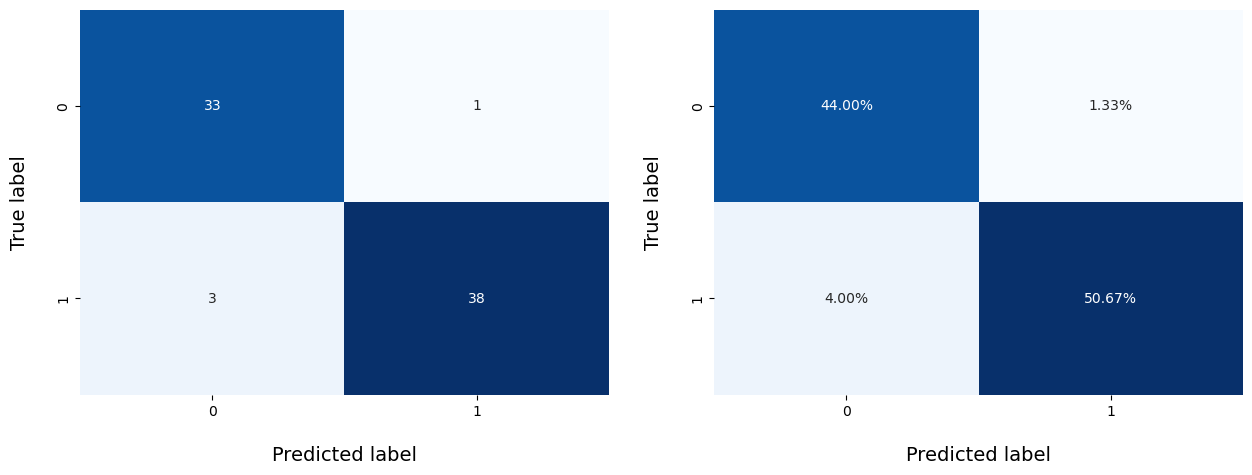

In [193]:
conf_matrix = confusion_matrix (  y_test, Ypred )

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

In [184]:
model = LogisticRegression(solver='liblinear') 
model.fit(X_train, y_train)
ypr = model.predict(X_test)

print(f'Models Accuracy = {round(accuracy_score(y_test,ypr),3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, ypr, target_names=target_names))

Models Accuracy = 97.3%
              precision    recall  f1-score   support

    Demented       0.94      1.00      0.97        34
Non Demented       1.00      0.95      0.97        41

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.97      0.97      0.97        75



Number of records in the test dataset: 75



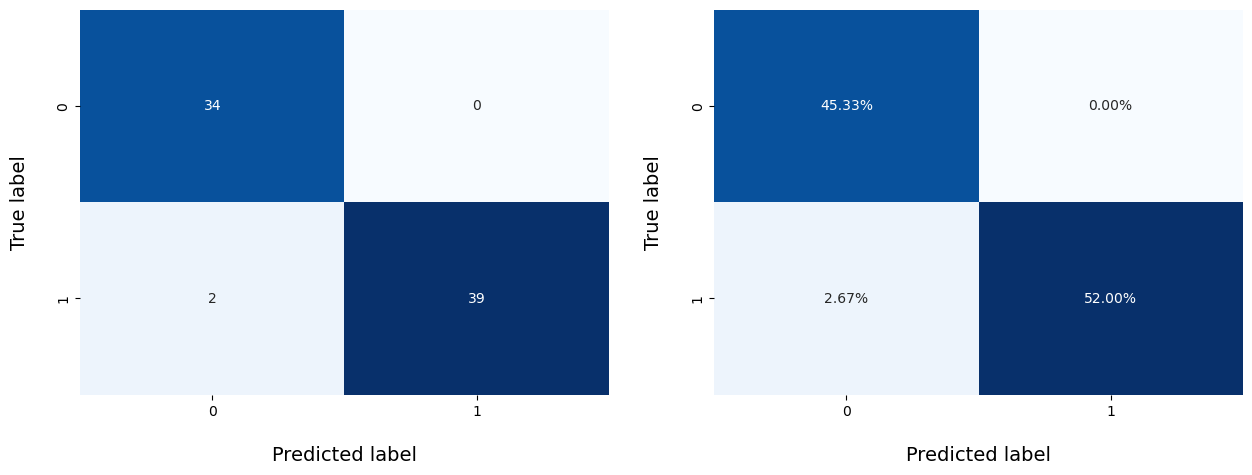

In [191]:
conf_matrix = confusion_matrix (  y_test, ypr )

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

In [208]:
model = SVC(C=1,kernel='linear') 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Models Accuracy = {round(accuracy_score(y_test,y_pred),3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, y_pred, target_names=target_names))



Models Accuracy = 89.3%
              precision    recall  f1-score   support

    Demented       0.91      0.85      0.88        34
Non Demented       0.88      0.93      0.90        41

    accuracy                           0.89        75
   macro avg       0.89      0.89      0.89        75
weighted avg       0.89      0.89      0.89        75



Number of records in the test dataset: 75



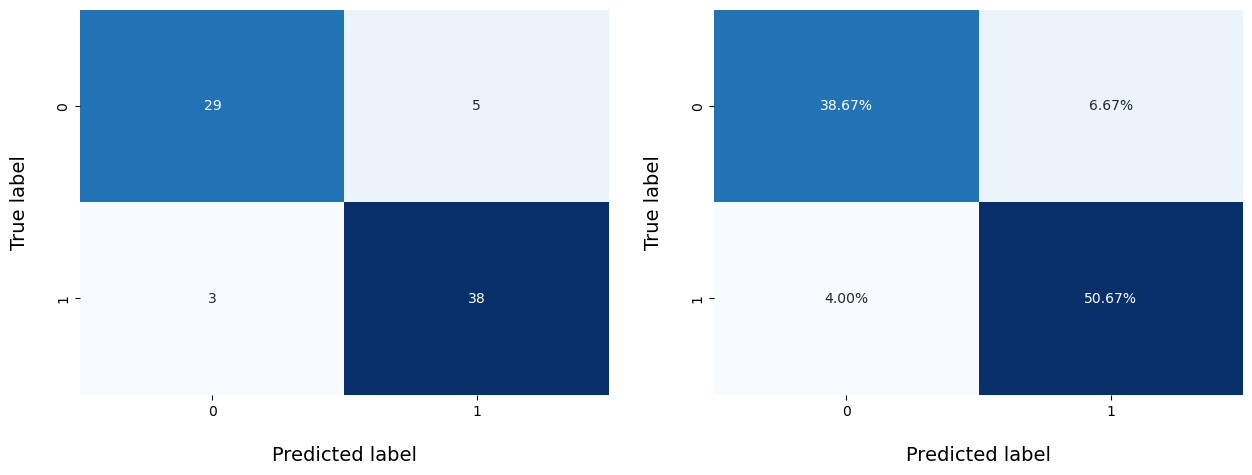

In [186]:
conf_matrix = confusion_matrix (  y_test, y_pred )

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

In [199]:
model =DecisionTreeClassifier(criterion='gini',splitter='best')
model.fit(X_train, y_train)
y_p = model.predict(X_test)

print(f'Models Accuracy = {round(accuracy_score(y_test,y_p),3)*100}%')
target_names = ['Demented', 'Non Demented']
print(classification_report(y_test, y_p, target_names=target_names))


Models Accuracy = 96.0%
              precision    recall  f1-score   support

    Demented       0.94      0.97      0.96        34
Non Demented       0.97      0.95      0.96        41

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



Number of records in the test dataset: 75



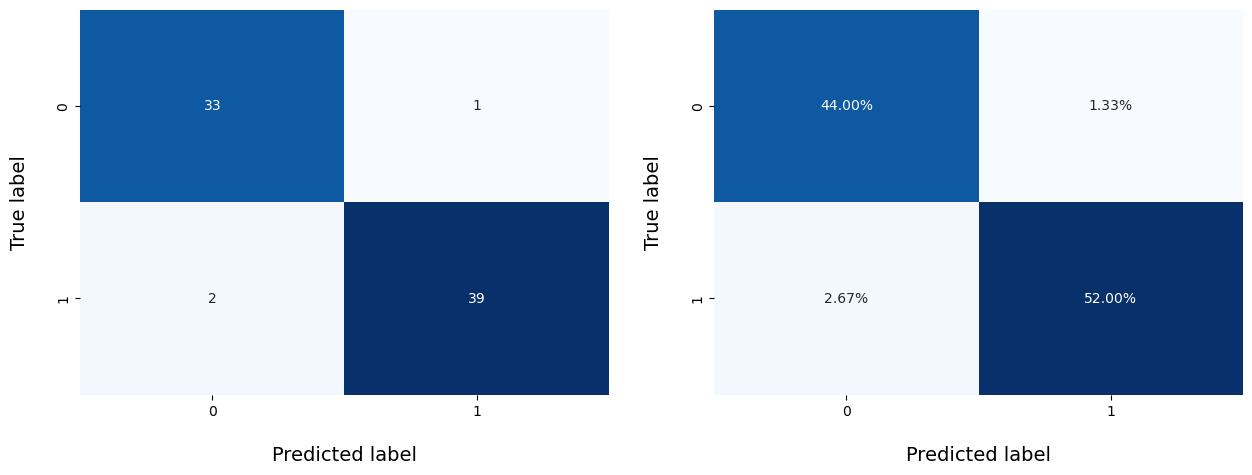

In [200]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (  y_test, y_p )

print ('Number of records in the test dataset: %d\n' %y_test.shape[0])

fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
#plot 1
sns.heatmap(conf_matrix,ax=axes[0],annot=True, cmap='Blues', cbar=False, fmt='d')
axes[0].set_xlabel('\nPredicted label', size = 14)
axes[0].set_ylabel('True label\n', size = 14)

# plot 2
sns.heatmap(conf_matrix/np.sum(conf_matrix),ax=axes[1], annot=True, 
            fmt='.2%', cmap='Blues', cbar=False)
axes[1].set_xlabel('\nPredicted label', size = 14)
axes[1].set_ylabel('True label\n', size = 14)
axes[1].yaxis.tick_left()
plt.show()

In [ ]:
0: non 1:Demented

In [ ]:
improve acuracy

In [ ]:
1D CNN

In [283]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,Flatten, Dropout, MaxPooling1D
from tensorflow.keras.utils import to_categorical

In [284]:
# converting labels to categorical
y_train_cat = to_categorical(y_train) #, num_classes=None, dtype='float32')
y_test_cat = to_categorical(y_test) #, num_classes=None, dtype='float32')

In [285]:
y_train_cat.shape

(298, 2)

In [286]:
y_train.shape

(298,)

In [287]:
# creating the 1D CNN model
def create_baseline():
    n_features, n_outputs = X_train_new.shape[1], 3
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_features,1)))
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(Dropout(0.2))
    # dropout to prevent overfitting
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [288]:
# calling the function to create the 1DCNN model and printing the model summary
model_1D_cnn= create_baseline()
model_1D_cnn.summary()

NameError: name 'X_train_new' is not defined

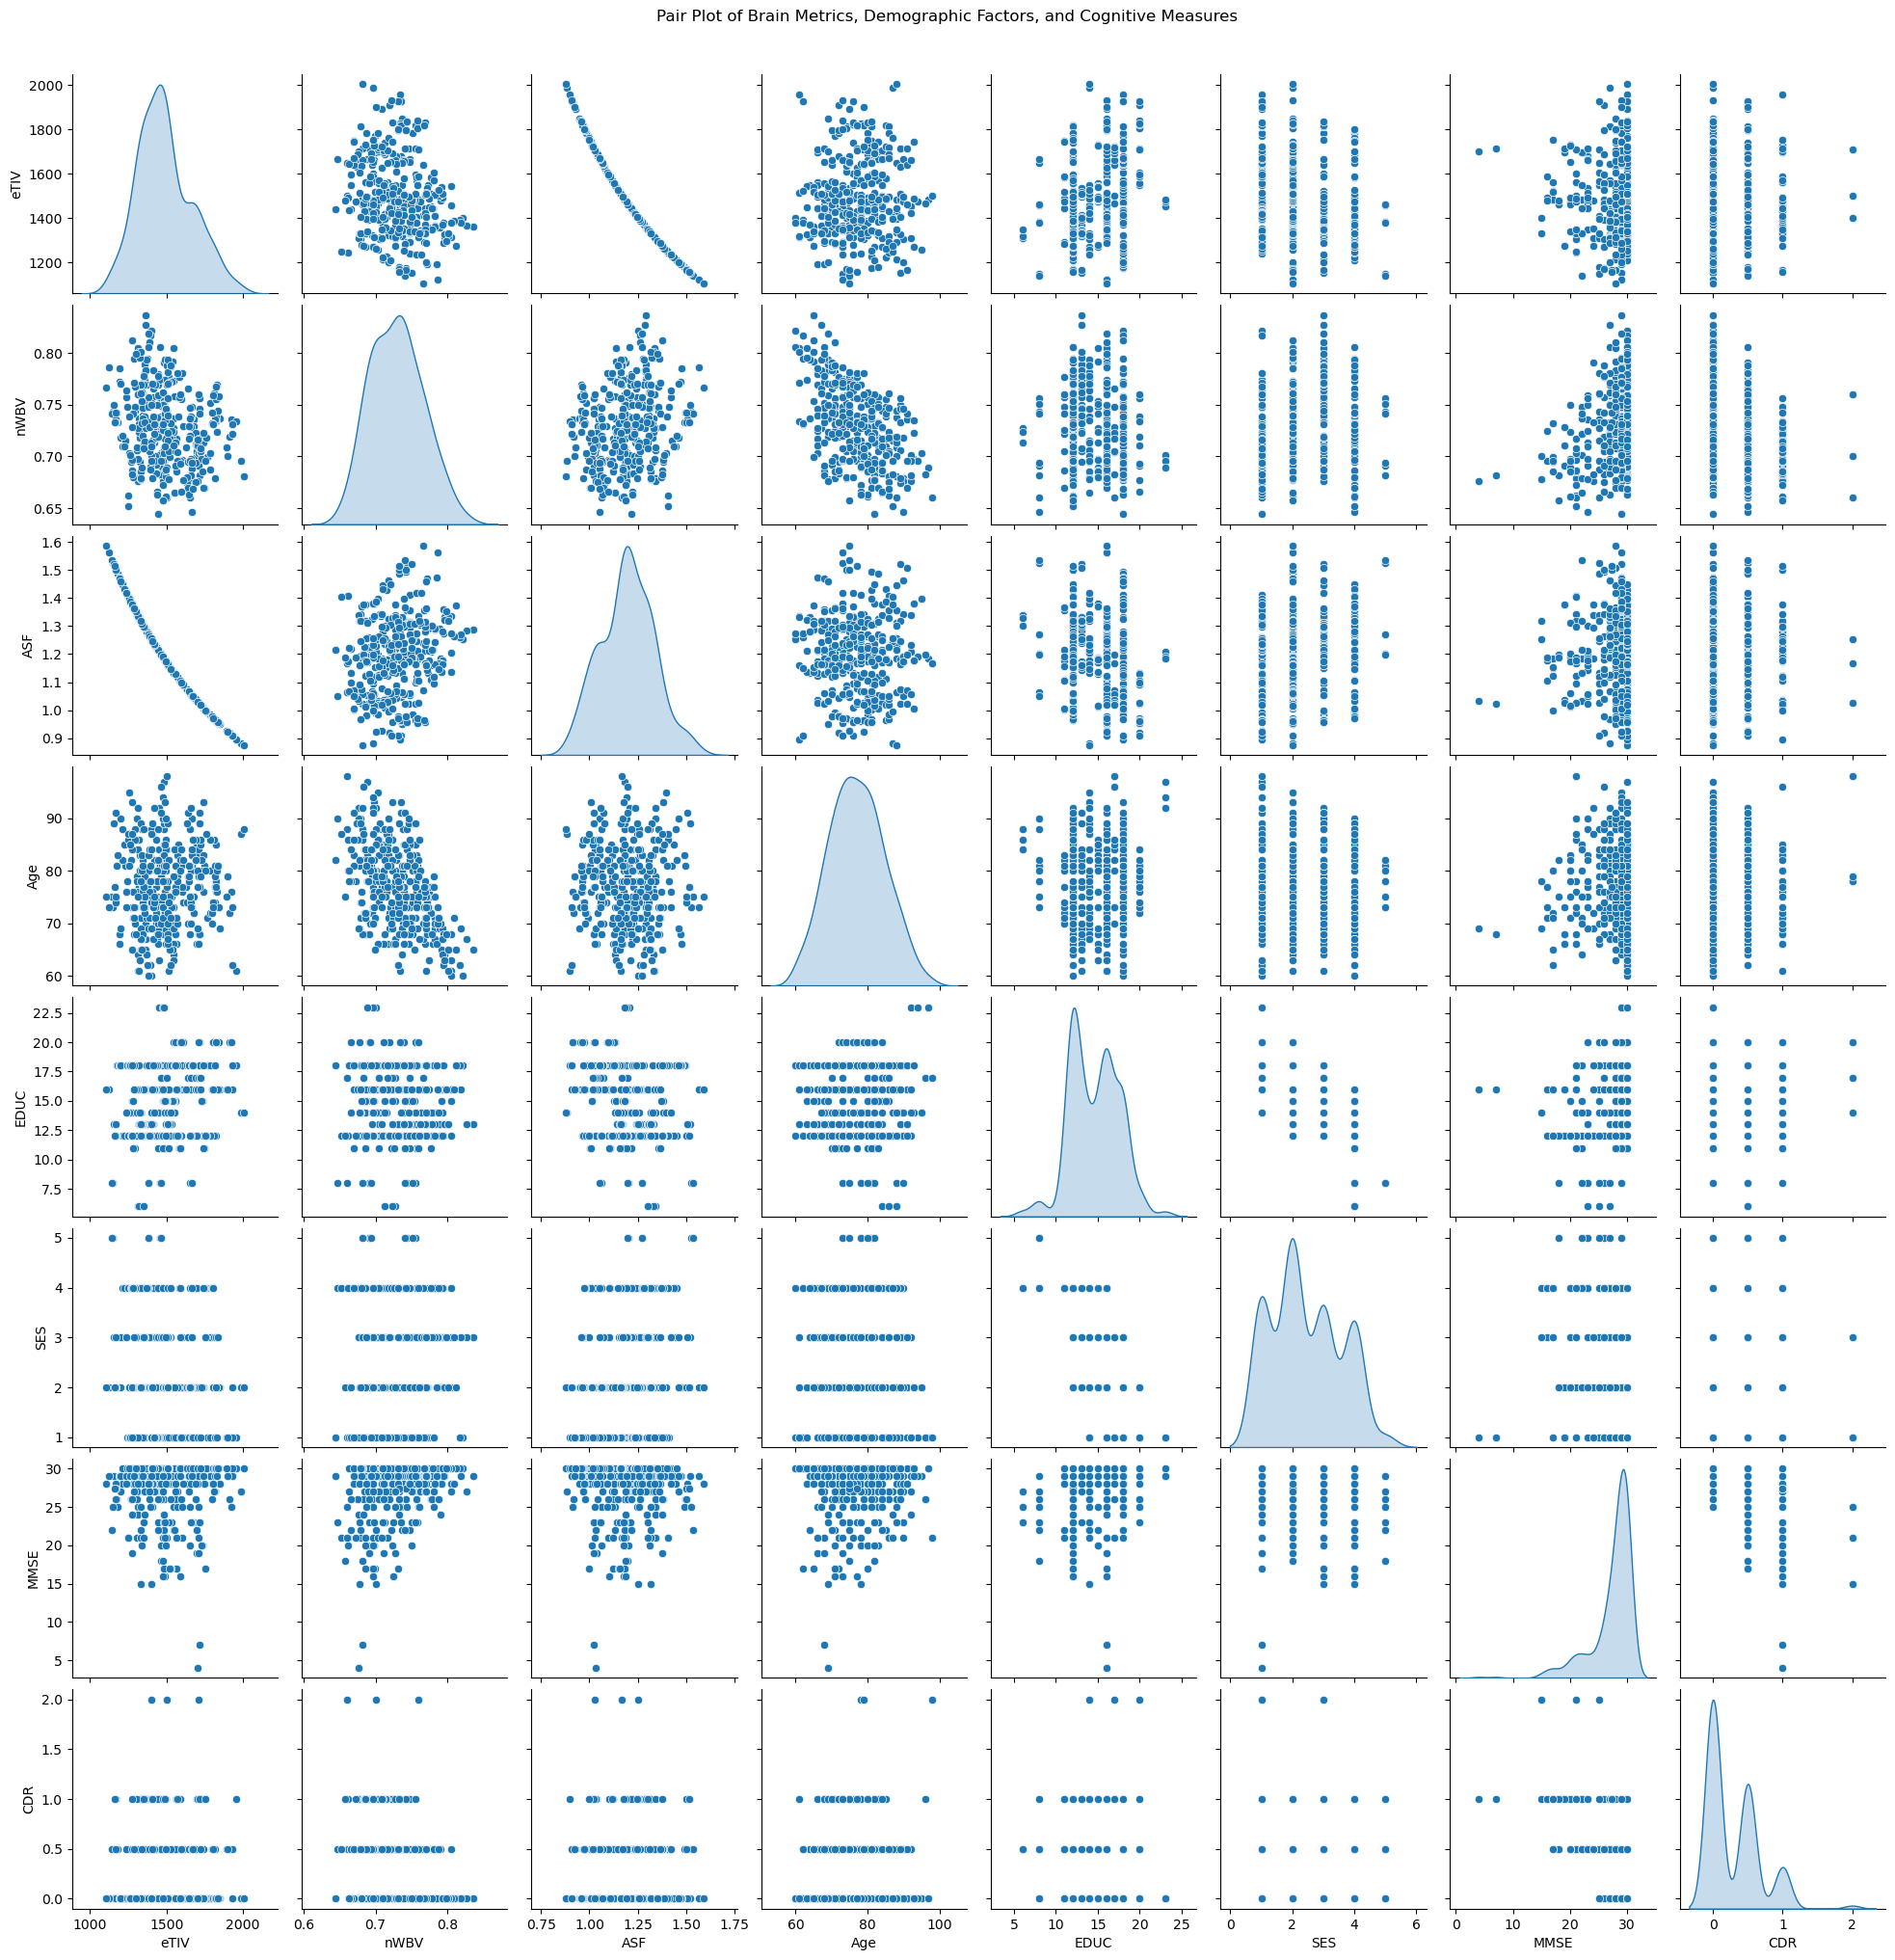

In [292]:
# Select relevant columns for exploration
columns_of_interest = ['eTIV', 'nWBV', 'ASF', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR']

# Create a subset DataFrame with selected columns
subset_df = df[columns_of_interest]

# Pair plot to visualize relationships
sns.pairplot(subset_df, diag_kind='kde')
plt.suptitle('Pair Plot of Brain Metrics, Demographic Factors, and Cognitive Measures', y=1.02)
plt.show()

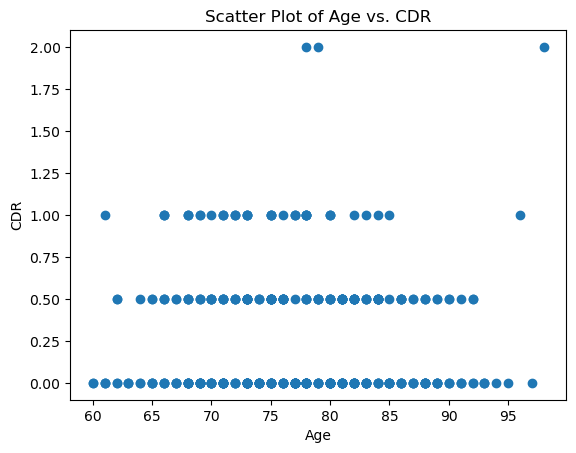

Pearson Correlation: -0.0263, p-value: 0.6132
Spearman Correlation: -0.0443, p-value: 0.3939


In [293]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the relevant columns

# Select relevant columns
columns_of_interest = ['Age', 'CDR']

# Create a subset DataFrame with selected columns
subset_df = df[columns_of_interest].dropna()  # Drop rows with missing values

# Calculate Pearson correlation coefficient and p-value
pearson_corr, pearson_p_value = pearsonr(subset_df['Age'], subset_df['CDR'])

# Calculate Spearman rank correlation coefficient and p-value
spearman_corr, spearman_p_value = spearmanr(subset_df['Age'], subset_df['CDR'])

# Plot the relationship
plt.scatter(subset_df['Age'], subset_df['CDR'])
plt.title('Scatter Plot of Age vs. CDR')
plt.xlabel('Age')
plt.ylabel('CDR')
plt.show()

# Print correlation results
print(f'Pearson Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}')
print(f'Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value:.4f}')


ValueError: The following variable cannot be assigned with wide-form data: `hue`

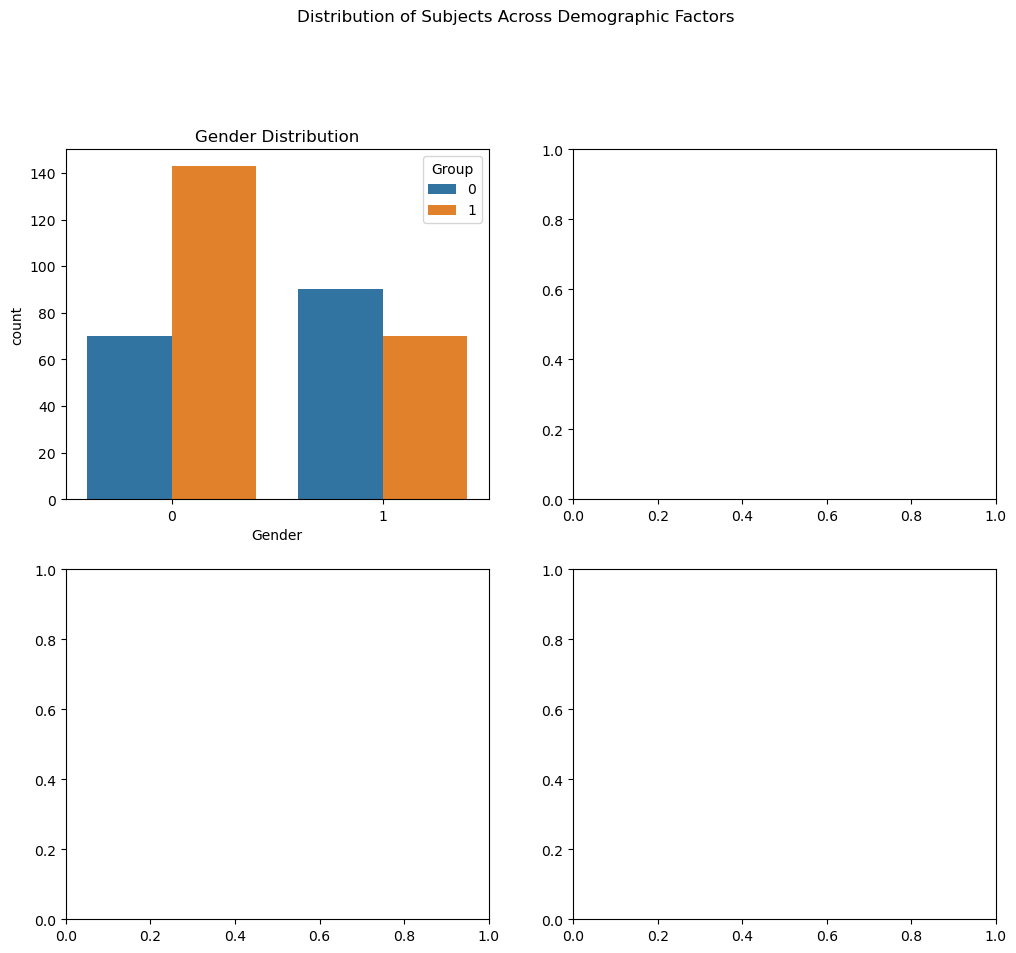

In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the relevant columns

# Select relevant columns
demographic_columns = ['Gender', 'Age', 'EDUC', 'SES']

# Create a subset DataFrame with selected columns
demographic_df = df[demographic_columns]

# Set up subplots for multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Distribution of Subjects Across Demographic Factors', y=1.02)

# Plot 1: Gender Distribution
sns.countplot(x='Gender', data=df, hue='Group', ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Plot 2: Age Distribution
sns.histplot(df['Age'], hue='Group', bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

# Plot 3: Education Distribution
sns.histplot(df['EDUC'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution')

# Plot 4: Socioeconomic Status (SES) Distribution
sns.countplot(x='SES', hue='Group', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Socioeconomic Status (SES) Distribution')

plt.tight_layout()
plt.show()


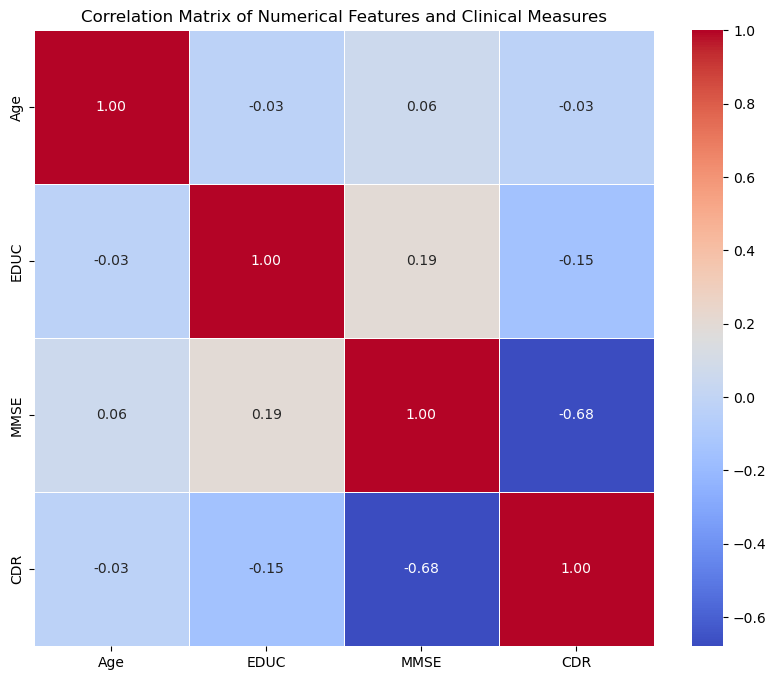

In [319]:
# Assuming your DataFrame is named 'df' and contains the relevant columns

# Select relevant numerical columns
numerical_columns = ['Age', 'EDUC', 'MMSE', 'CDR']

# Create a subset DataFrame with selected columns
numerical_df = df[numerical_columns]  # Drop rows with missing values

# Calculate correlation coefficients
correlation_matrix = numerical_df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features and Clinical Measures')
plt.show()

In [314]:
# Function to calculate correlation coefficient and p-value
def calculate_correlation(column1, column2):
    correlation_coefficient, p_value = pearsonr(column1, column2)
    return correlation_coefficient, p_value

# Calculate correlation coefficients and p-values
for feature in numerical_columns:
    for clinical_measure in numerical_columns:
        if feature != clinical_measure:
            correlation_coeff, p_val = calculate_correlation(numerical_df[feature], numerical_df[clinical_measure])
            print(f'{feature} vs {clinical_measure}: Correlation={correlation_coeff:.4f}, p-value={p_val:.4f}')


Age vs EDUC: Correlation=-0.0279, p-value=0.5914
Age vs MMSE: Correlation=0.0556, p-value=0.2841
Age vs CDR: Correlation=-0.0263, p-value=0.6132
EDUC vs Age: Correlation=-0.0279, p-value=0.5914
EDUC vs MMSE: Correlation=0.1945, p-value=0.0002
EDUC vs CDR: Correlation=-0.1531, p-value=0.0030
MMSE vs Age: Correlation=0.0556, p-value=0.2841
MMSE vs EDUC: Correlation=0.1945, p-value=0.0002
MMSE vs CDR: Correlation=-0.6798, p-value=0.0000
CDR vs Age: Correlation=-0.0263, p-value=0.6132
CDR vs EDUC: Correlation=-0.1531, p-value=0.0030
CDR vs MMSE: Correlation=-0.6798, p-value=0.0000


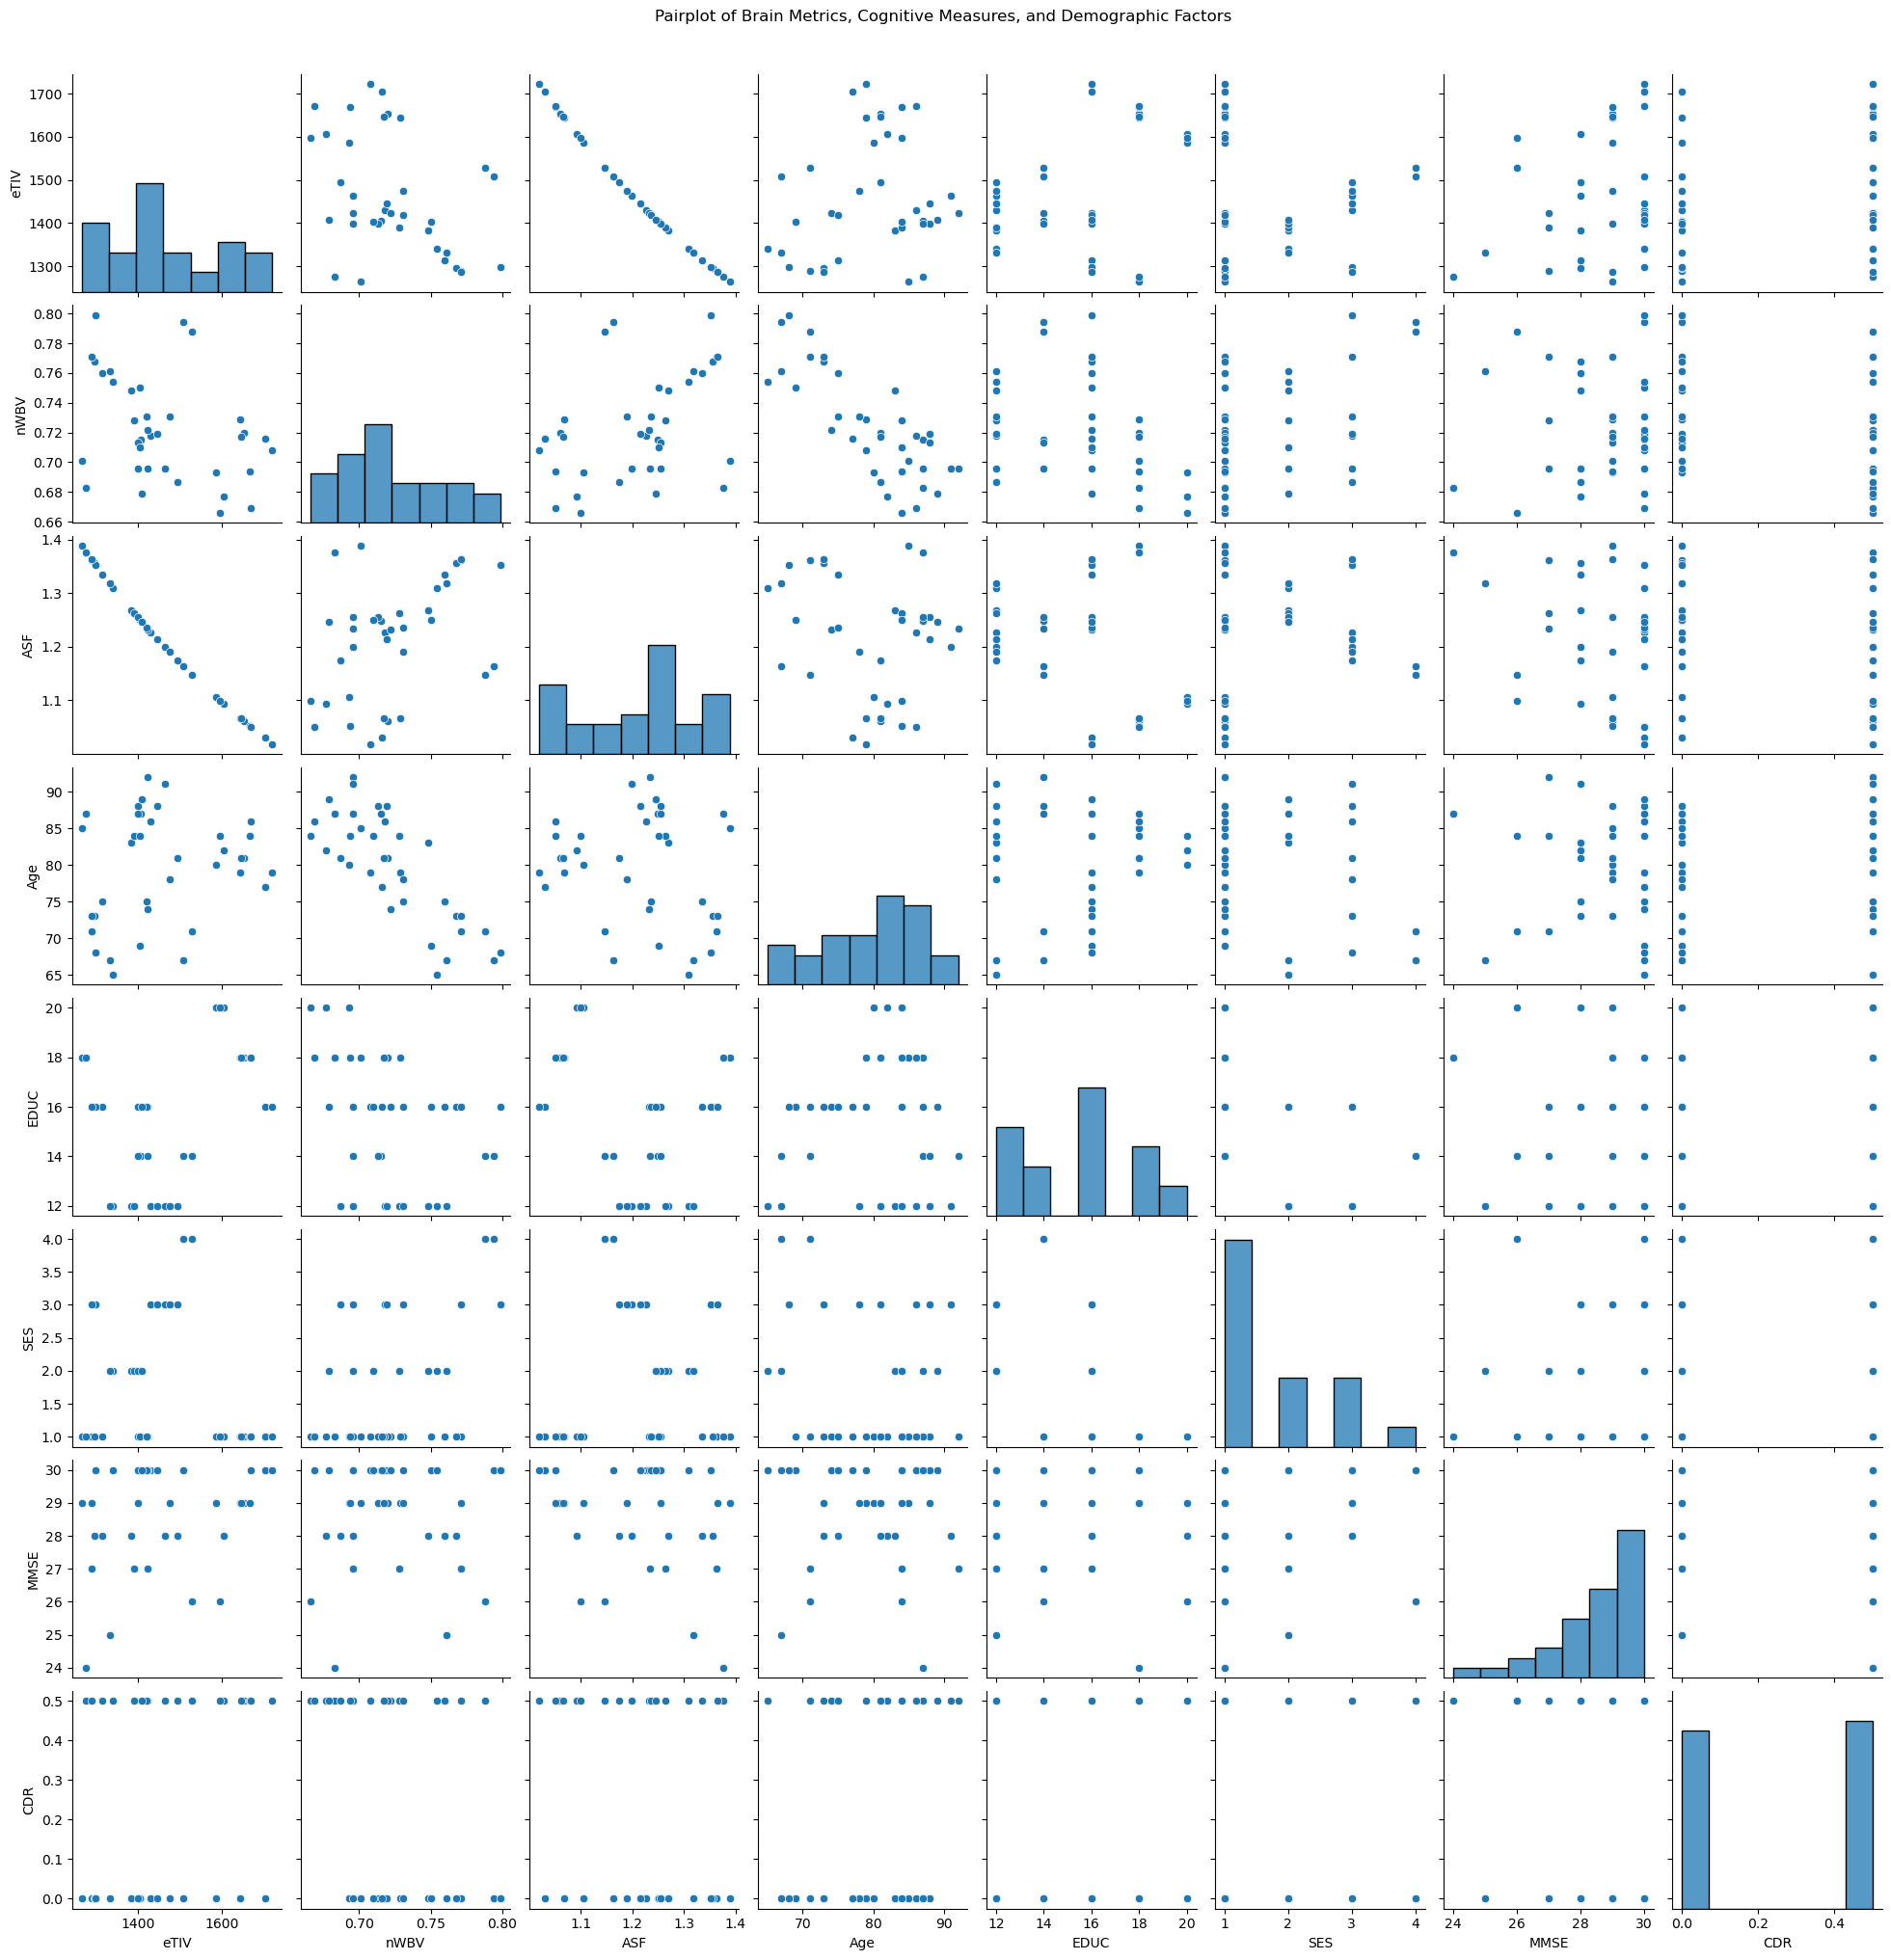

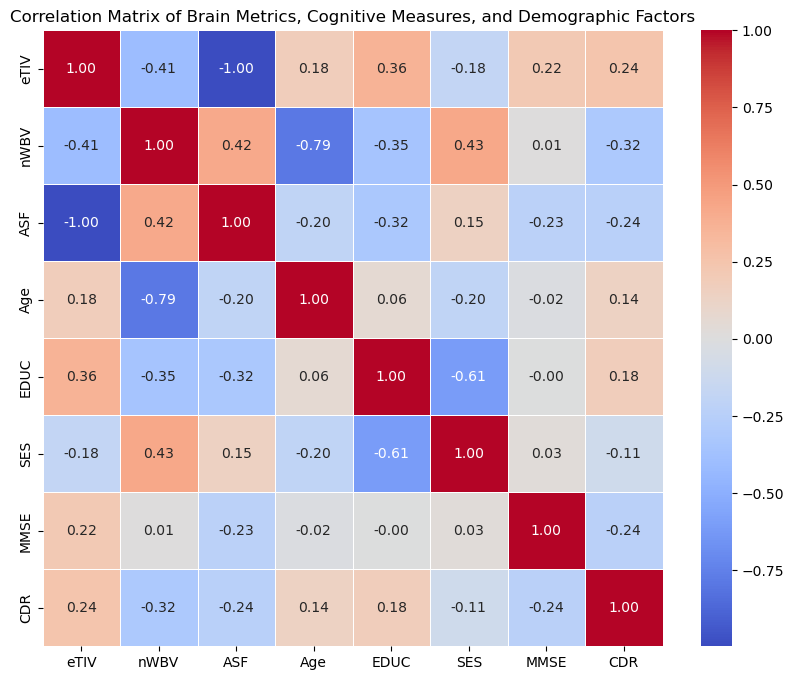

In [317]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and contains the relevant columns

# Select relevant columns including brain metrics, cognitive measures, and demographic factors
selected_columns = ['eTIV', 'nWBV', 'ASF', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR']

# Create a subset DataFrame with selected columns
selected_df = df2[selected_columns].dropna()  # Drop rows with missing values

# Pairplot to visualize relationships
sns.pairplot(selected_df)
plt.suptitle('Pairplot of Brain Metrics, Cognitive Measures, and Demographic Factors', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = selected_df.corr()

# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Brain Metrics, Cognitive Measures, and Demographic Factors')
plt.show()


In [308]:
df['CDR'].unique()

array([0. , 0.5, 1. , 2. ])